 ## Food Delivery Duration Prediction:

that is so important for company to delivery food on time, and it is so effective on customers decision to choose a company for delivery food as well. in this project, I am trying to build a prediction model to estimate time taken for a delivery.which is based on total seconds values between 'created_at 'and 'actual_delivery_time'. Intially,the compelling insights will be presented and finally two different models will be implemented on clean data sets, results of two different machine learnig models would be shown as well. 

# Load packages

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [211]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import  SGDRegressor,LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.datasets import  make_regression
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
import statsmodels as sm
sgdr = SGDRegressor()
lr=LinearRegression()

In [164]:
train=pd.read_csv('historical_data.csv')
test=pd.read_csv('predict_data.csv')

In [165]:
train.head()

,market_id,created_at,actual_delivery_time,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,3441,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,1900,1.0,2.0,2.0,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1900,1.0,0.0,0.0,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,6900,1.0,1.0,2.0,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,3900,6.0,6.0,9.0,650.0


In [166]:
train.shape

(197428, 9)

In [167]:
test.head()

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200


In [168]:
test.shape

(54778, 9)

In [169]:
train.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,196902.000000
mean,2.978706,3530.510272,2682.331402,44.808093,41.739747,58.050065,545.358935
std,1.524867,2053.496711,1823.093688,34.526783,32.145733,52.661830,219.352902
min,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,1686.000000,1400.000000,17.000000,15.000000,17.000000,382.000000
50%,3.000000,3592.000000,2200.000000,37.000000,34.000000,41.000000,544.000000
75%,4.000000,5299.000000,3395.000000,65.000000,62.000000,85.000000,702.000000
max,6.000000,6987.000000,27100.000000,171.000000,154.000000,285.000000,2088.000000


In [170]:
# check data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   subtotal                                      197428 non-null  int64  
 5   total_onshift_dashers                         181166 non-null  float64
 6   total_busy_dashers                            181166 non-null  float64
 7   total_outstanding_orders                      181166 non-null  float64
 8   estimated_store_to_consumer_driving_duration  196902 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 

In [171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   market_id                                     54528 non-null  float64
 1   created_at                                    54778 non-null  object 
 2   store_id                                      54778 non-null  int64  
 3   subtotal                                      54778 non-null  int64  
 4   total_onshift_dashers                         50145 non-null  float64
 5   total_busy_dashers                            50145 non-null  float64
 6   total_outstanding_orders                      50145 non-null  float64
 7   estimated_store_to_consumer_driving_duration  54767 non-null  float64
 8   delivery_id                                   54778 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [172]:
# check data timeline for training
print(min(train['created_at']),max(train['created_at']))

2014-10-19 05:24:15 2015-02-18 06:00:44


In [173]:
# check data timeline for testing
print(min(test['created_at']),max(test['created_at']))

2015-02-18 14:50:28 2015-02-25 05:59:49


The timeline for training is 4 months between (2014-10-19)and 2015-02-18 and for testing data set , records are only for one week (2015-02-18 through 2015-02-25)

# Data processing

In [175]:
# change type of daytime column
train['created_at']=pd.to_datetime(train['created_at'])
train['actual_delivery_time']=pd.to_datetime(train['actual_delivery_time'])
## change type of daytime column
test['created_at']=pd.to_datetime(test['created_at'])

In [176]:
train['Date_in']=train['created_at'].dt.date
train['create_DOW']=train['created_at'].dt.dayofweek
train['create_m']=train['created_at'].dt.month
train['hour_in']=train['created_at'].dt.hour
train['minute_in']=train['created_at'].dt.minute
train['second_in']=train['created_at'].dt.second
##
train['hour_delivery']=train['actual_delivery_time'].dt.hour
train['minute_delivery']=train['actual_delivery_time'].dt.minute
train['second_delivery']=train['actual_delivery_time'].dt.second


## test data set:
test['create_DOW']=test['created_at'].dt.dayofweek
test['create_m']=test['created_at'].dt.month
test['hour_in']=test['created_at'].dt.hour

In [177]:
train['act_delivery_duration'] = train['actual_delivery_time'] - train['created_at']
train['Actual_duration_sec']=abs((train['hour_in']*3600+train['minute_in']*60+train['second_in'])-(train['hour_delivery']*3600+train['minute_delivery']*60+train['second_delivery']))


In [149]:
train['duration']=abs((train['hour_in']*3600+train['minute_in']*60+train['second_in'])-(train['hour_delivery']*3600+train['minute_delivery']*60+train['second_delivery']))

In [178]:
train[['estimated_store_to_consumer_driving_duration','actual_delivery_time','act_delivery_duration','Actual_duration_sec']]

,estimated_store_to_consumer_driving_duration,actual_delivery_time,act_delivery_duration,Actual_duration_sec
0,861.0,2015-02-06 23:27:16,0 days 01:02:59,3779.0
1,690.0,2015-02-10 22:56:29,0 days 01:07:04,4024.0
2,690.0,2015-01-22 21:09:09,0 days 00:29:41,1781.0
3,289.0,2015-02-03 22:13:00,0 days 00:51:15,3075.0
4,650.0,2015-02-15 03:20:26,0 days 00:39:50,2390.0
...,...,...,...,...
197423,331.0,2015-02-17 01:24:48,0 days 01:05:07,3907.0
197424,915.0,2015-02-13 00:58:22,0 days 00:56:23,3383.0
197425,795.0,2015-01-24 05:36:16,0 days 00:50:08,3008.0
197426,384.0,2015-02-01 19:23:22,0 days 01:05:07,3907.0


# Missing value processing 

In [179]:
train.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
subtotal                                            0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_store_to_consumer_driving_duration      526
Date_in                                             0
create_DOW                                          0
create_m                                            0
hour_in                                             0
minute_in                                           0
second_in                                           0
hour_delivery                                       7
minute_delivery                                     7
second_delivery                                     7
act_delivery_duration       

In [180]:
test.isnull().sum()

market_id                                        250
created_at                                         0
store_id                                           0
subtotal                                           0
total_onshift_dashers                           4633
total_busy_dashers                              4633
total_outstanding_orders                        4633
estimated_store_to_consumer_driving_duration      11
delivery_id                                        0
create_DOW                                         0
create_m                                           0
hour_in                                            0
dtype: int64

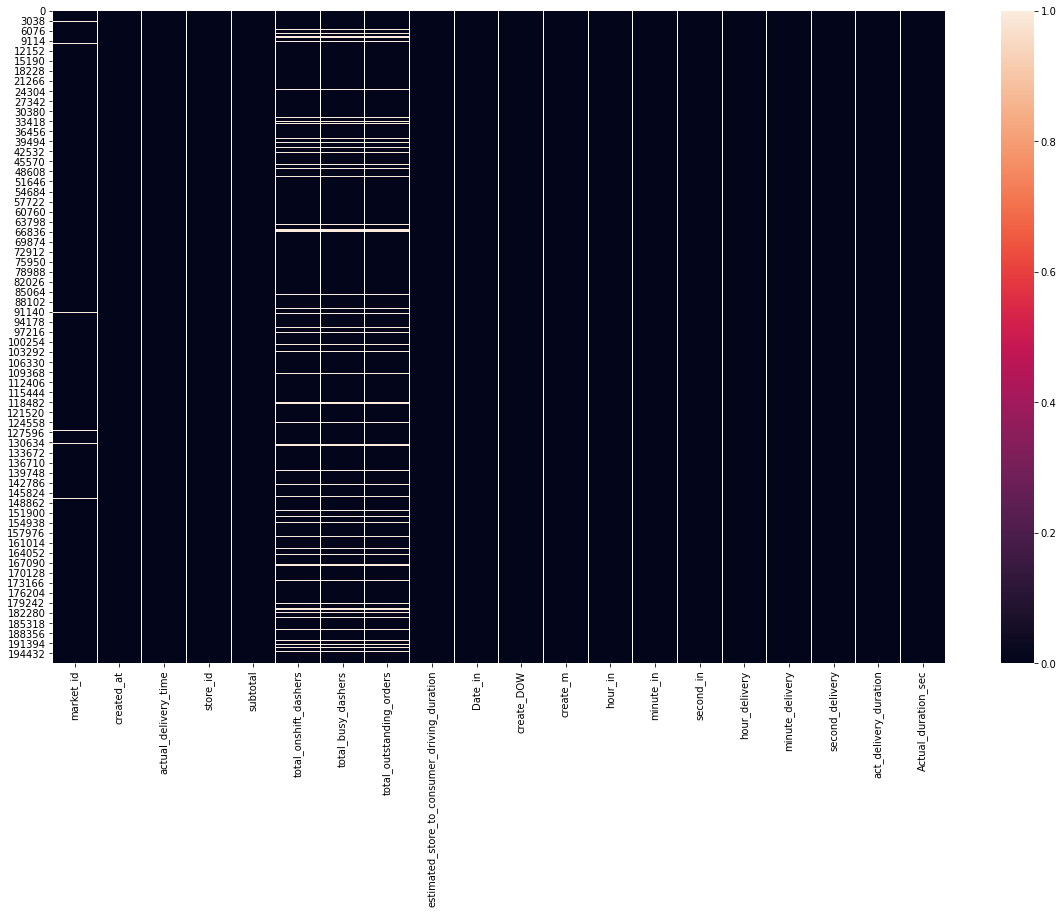

In [181]:
# show missing value with white color 
plt.figure(figsize=(20,12))
sns.heatmap(train.isna())

# cleaning data:



market_id:not useful , we will drop it.

store_id: will ignore.

actual_delivery_time : very small amount is missed, we will drop them.

total_onshift_dashers,total_busy_dashers, total_outstanding_orders have same number of missing values.



In [182]:
# we will drop nan from different columns and corresponding rows
df_train=train[train['actual_delivery_time'].notna()]
df_train=df_train[df_train['market_id'].notna()]
df_train=df_train[df_train['total_onshift_dashers'].notna()]
df_train=df_train[df_train['estimated_store_to_consumer_driving_duration'].notna()]
df_train.drop(columns=['Date_in','minute_in','second_in','hour_delivery','minute_delivery','second_delivery','act_delivery_duration'],inplace=True)
df_train.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
subtotal                                        0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
create_DOW                                      0
create_m                                        0
hour_in                                         0
Actual_duration_sec                             0
dtype: int64

In [183]:
test=test[test['market_id'].notna()]
test=test[test['total_onshift_dashers'].notna()]
test=test[test['estimated_store_to_consumer_driving_duration'].notna()]
test.isna().sum()

market_id                                       0
created_at                                      0
store_id                                        0
subtotal                                        0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_id                                     0
create_DOW                                      0
create_m                                        0
hour_in                                         0
dtype: int64

# Categorical variable

2.0    52297
4.0    45481
1.0    36146
3.0    20655
5.0    17033
6.0      626
Name: market_id, dtype: int64
------------------
2     33687
1     26258
3     24214
20    14196
4     13572
19    12272
0     11745
21    10464
22     8062
5      6242
18     4599
17     3136
16     1979
6      1253
15      511
14       39
7         9
Name: hour_in, dtype: int64
------------------
5    30163
6    28934
4    24588
0    23798
3    22255
2    21328
1    21172
Name: create_DOW, dtype: int64
------------------
2    111865
1     60373
Name: create_m, dtype: int64
------------------


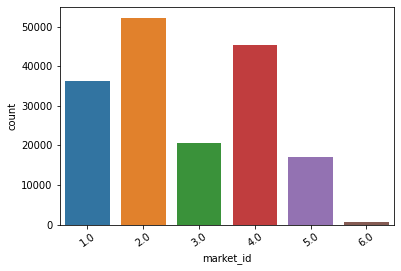

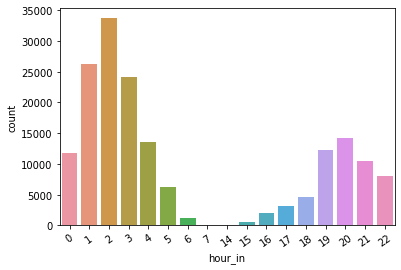

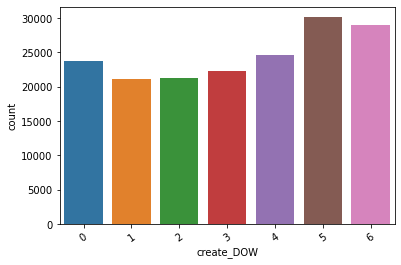

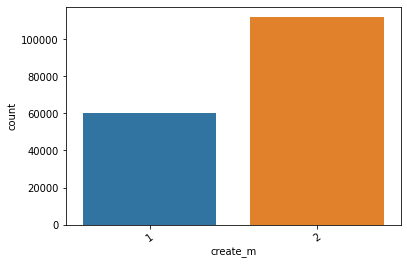

In [244]:
categorical_columns=['market_id','hour_in','create_DOW','create_m']
yy=2
for i,c in enumerate(categorical_columns):
    df_cat = df_train[c].value_counts().to_frame().reset_index()
    df_cat.columns = [c,"count"]
    value = [1,int(yy)]# for plot index
    plt.figure(i)
    sns.barplot(df_cat[c],df_cat["count"])
    plt.xticks(rotation=35)
    #plt.figure(figsize = (10,8))
    plt.savefig("value" + str(yy) + ".png",dpi = 300,bbox_inches = 'tight')
    yy=yy+1 
    print(df_train[c].value_counts())
    print("------------------")

Finding:

 Market_id 2 and 4 has the most delivery demand.
 
 majority of demand are during weekend.
 
 more demand for delivery food during 12am-5am and 6pm to 11 pm.
 
 more demand in February compare to January.


In [185]:
df_train.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,create_DOW,create_m,hour_in,Actual_duration_sec
count,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000,179759.000000
mean,2.748669,3545.087456,2699.223460,44.820037,41.754193,58.067513,545.889218,3.223905,1.647951,8.469512,5302.335015
std,1.331756,2057.688645,1829.165815,34.541868,32.160043,52.683946,218.578610,2.043741,0.477611,8.676225,13863.552402
min,1.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.000000,0.000000,101.000000
25%,2.000000,1686.000000,1418.000000,17.000000,15.000000,17.000000,383.000000,1.000000,1.000000,2.000000,2123.000000
50%,2.000000,3614.000000,2225.000000,37.000000,34.000000,41.000000,544.000000,3.000000,2.000000,3.000000,2697.000000
75%,4.000000,5323.000000,3415.000000,65.000000,62.000000,85.000000,703.000000,5.000000,2.000000,19.000000,3475.000000
max,6.000000,6987.000000,26800.000000,171.000000,154.000000,285.000000,2088.000000,6.000000,2.000000,23.000000,85869.000000


In [186]:
test.describe()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,create_DOW,create_m,hour_in
count,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.0,49913.000000
mean,2.796526,3508.048384,2728.935187,49.070623,43.506221,62.549356,548.266844,126164.703123,3.226514,2.0,8.569331
std,1.340086,2053.769710,1901.862645,37.595197,34.046571,56.363563,218.932825,72713.665883,2.062306,0.0,8.742751
min,1.000000,2.000000,0.000000,-1.000000,-4.000000,-9.000000,0.000000,20.000000,0.000000,2.0,0.000000
25%,2.000000,1683.000000,1425.000000,19.000000,16.000000,19.000000,386.000000,62982.000000,1.000000,2.0,2.000000
50%,2.000000,3573.000000,2241.000000,41.000000,36.000000,45.000000,545.000000,126310.000000,3.000000,2.0,3.000000
75%,4.000000,5268.000000,3448.000000,71.000000,63.000000,91.000000,703.000000,188951.000000,5.000000,2.0,19.000000
max,6.000000,6986.000000,29925.000000,175.000000,169.000000,292.000000,1550.000000,252031.000000,6.000000,2.0,23.000000


In [187]:
#there are some negative values, we are going set them to zero 
df_train.loc[df_train['total_onshift_dashers']<0,'total_onshift_dashers']=0
df_train.loc[df_train['total_busy_dashers']<0,'total_busy_dashers']=0
df_train.loc[df_train['total_outstanding_orders']<0,'total_outstanding_orders']=0

## same process for test data:

test.loc[test['total_onshift_dashers']<0,'total_onshift_dashers']=0
test.loc[test['total_busy_dashers']<0,'total_busy_dashers']=0
test.loc[test['total_outstanding_orders']<0,'total_outstanding_orders']=0

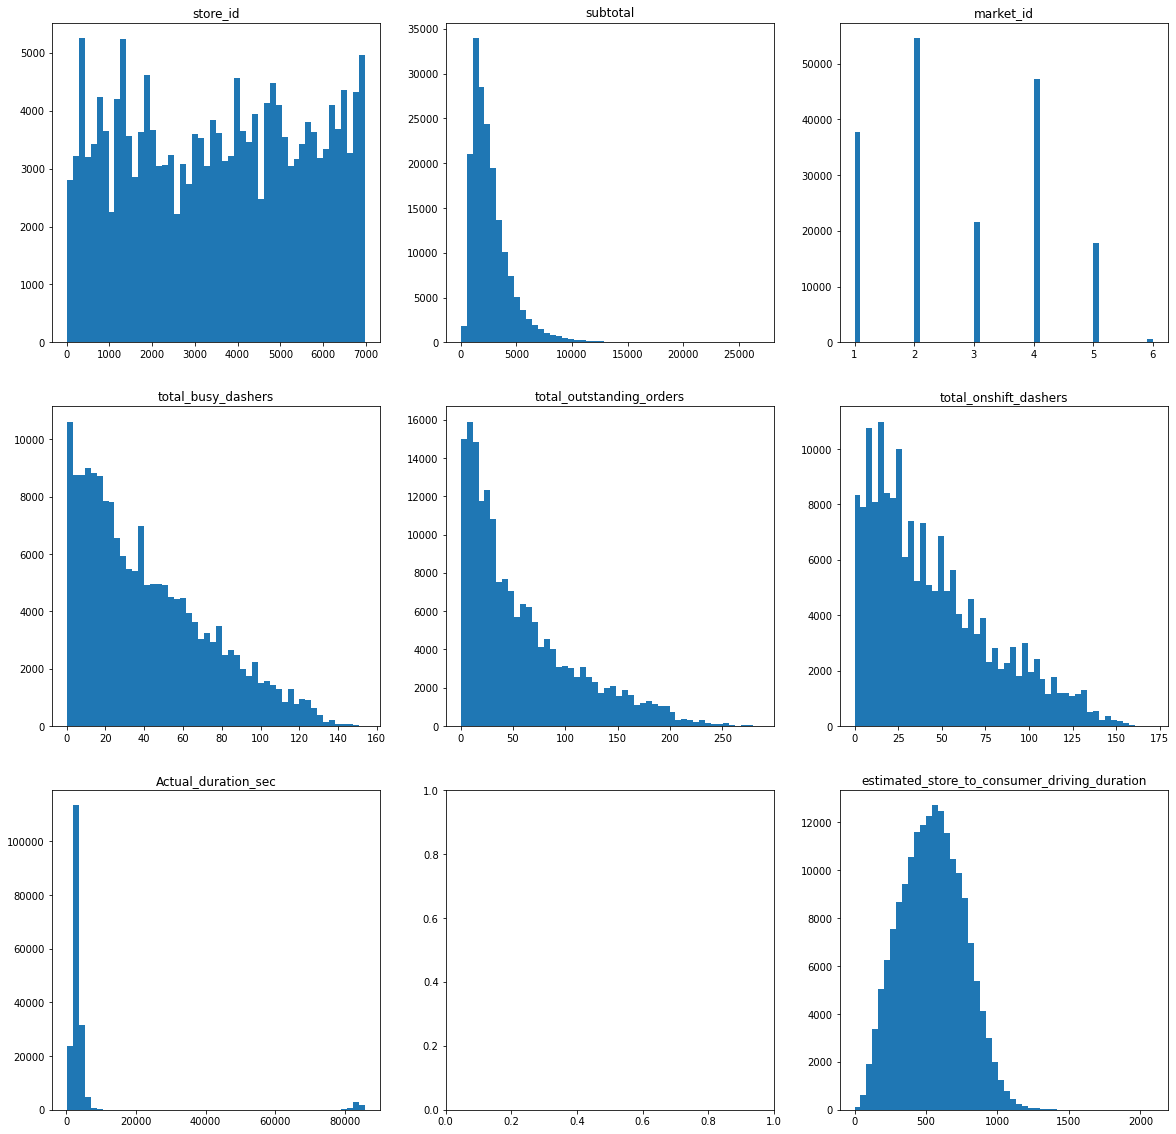

In [188]:
## check numerical variable distribution:
numerical_columns=['market_id','store_id','subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','estimated_store_to_consumer_driving_duration','Actual_duration_sec']
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i,n in enumerate(numerical_columns):
    axes[i//3][(i%3)-1].hist(df_train[n],bins=50)
    axes[i//3][(i%3)-1].set_title(n)

# Outlier processing:
it seems data doesnt have any outliers 


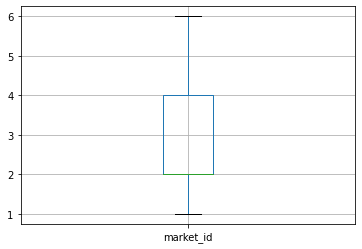

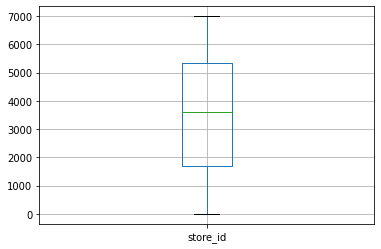

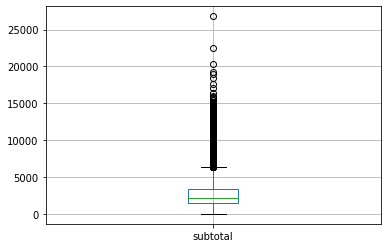

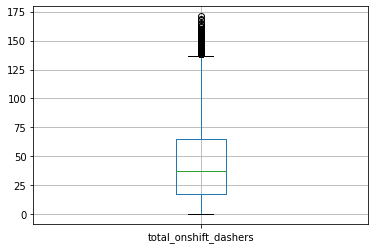

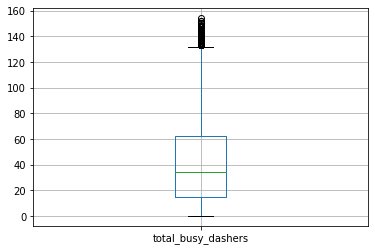

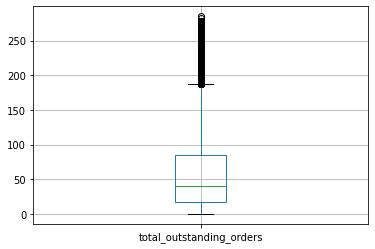

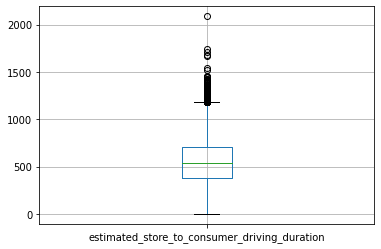

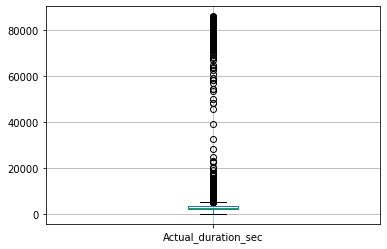

In [189]:
for i in numerical_columns:
  df_train.boxplot(i)
  plt.show()

# Multivariable

In [190]:
df_train.corr()

,market_id,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,create_DOW,create_m,hour_in,Actual_duration_sec
market_id,1.000000,0.039897,-0.002169,0.069602,0.060354,0.063566,0.017637,-0.000599,0.017175,-0.009006,-0.012003
store_id,0.039897,1.000000,-0.013220,-0.022978,-0.023158,-0.020274,0.000111,-0.000931,0.006270,0.011801,0.003785
subtotal,-0.002169,-0.013220,1.000000,0.130988,0.125705,0.130122,0.038424,0.032590,-0.003117,-0.190610,-0.011660
total_onshift_dashers,0.069602,-0.022978,0.130988,1.000000,0.943729,0.936173,0.045644,0.102432,0.024606,-0.374219,-0.122851
total_busy_dashers,0.060354,-0.023158,0.125705,0.943729,1.000000,0.932939,0.044191,0.085693,-0.047302,-0.349600,-0.117994
total_outstanding_orders,0.063566,-0.020274,0.130122,0.936173,0.932939,1.000000,0.039456,0.087309,0.044857,-0.361888,-0.113478
estimated_store_to_consumer_driving_duration,0.017637,0.000111,0.038424,0.045644,0.044191,0.039456,1.000000,0.009874,0.009350,-0.025258,0.044070
create_DOW,-0.000599,-0.000931,0.032590,0.102432,0.085693,0.087309,0.009874,1.000000,-0.101926,0.014622,0.022673
create_m,0.017175,0.006270,-0.003117,0.024606,-0.047302,0.044857,0.009350,-0.101926,1.000000,-0.031588,-0.009162
hour_in,-0.009006,0.011801,-0.190610,-0.374219,-0.349600,-0.361888,-0.025258,0.014622,-0.031588,1.000000,0.279957


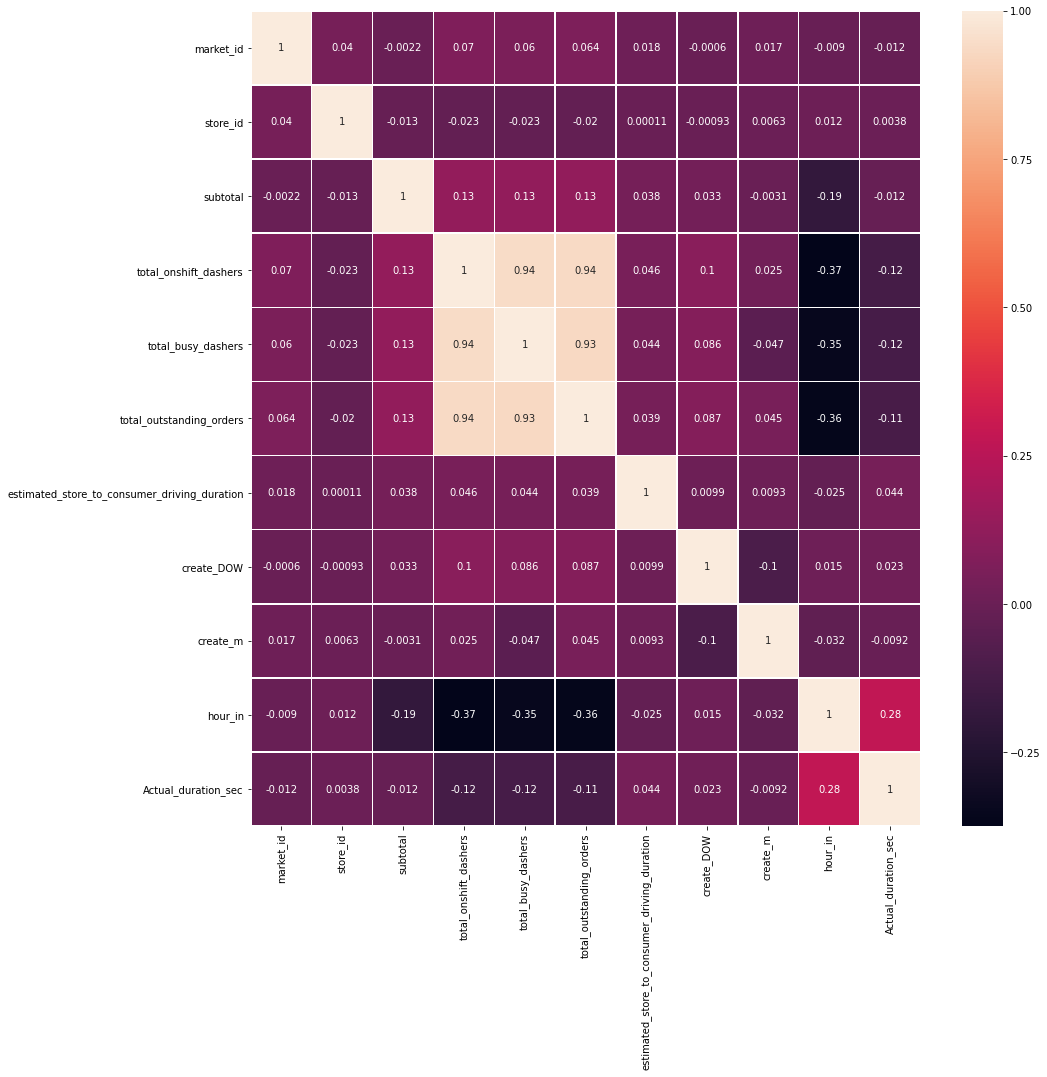

In [191]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(df_train.corr(),annot=True,linewidths=.5)

total_onshift_dashers,total_busy_dashers,total_outstanding_orders are  highly correlated.


# Delivery time duration based on different features

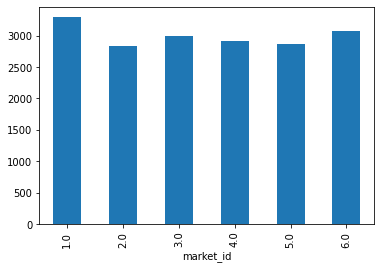

In [245]:
df_train.groupby(['market_id'])['Actual_duration_sec'].mean().plot.bar()
plt.savefig('market_id vs. duration.png')

delivery time are not variety by market_id

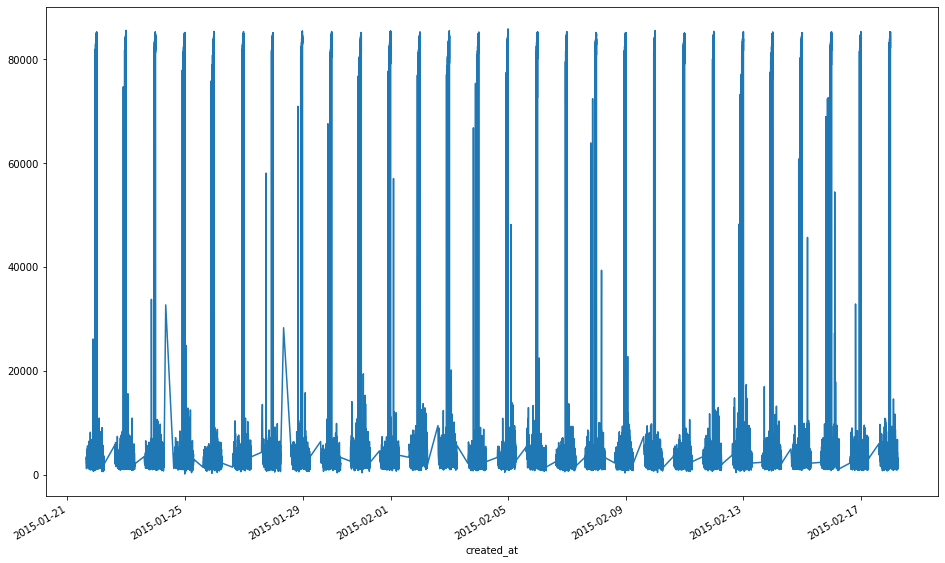

In [193]:
plt.figure(figsize=(16,10))
df_train.groupby(df_train['created_at']).mean()['Actual_duration_sec'].plot()

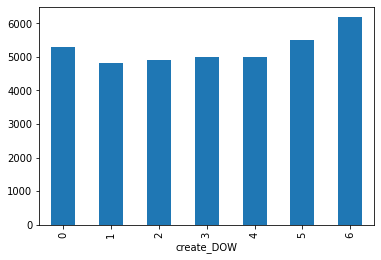

In [194]:
df_train.groupby(['create_DOW'])['Actual_duration_sec'].mean().plot.bar()

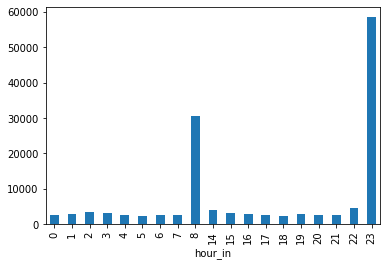

In [195]:
df_train.groupby(['hour_in'])['Actual_duration_sec'].mean().plot.bar()

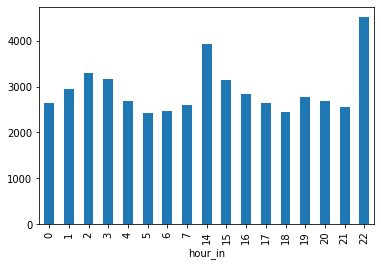

In [196]:
df_train=df_train[(df_train['hour_in']!=8)]
df_train=df_train[df_train['hour_in']!=23]
df_train.groupby(['hour_in'])['Actual_duration_sec'].mean().plot.bar()


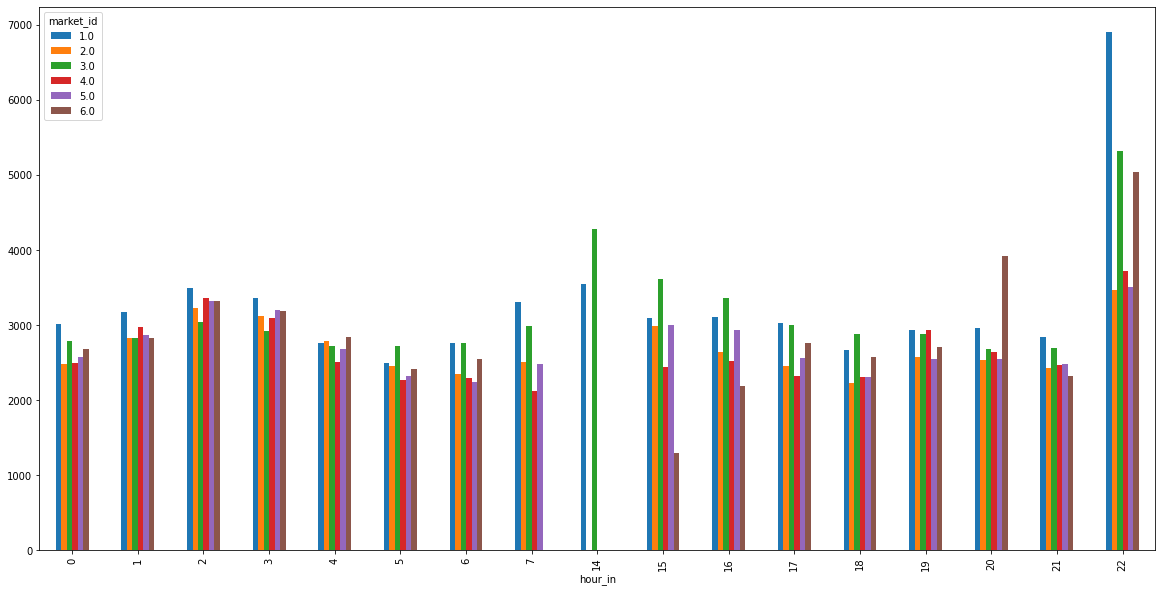

In [246]:
df_train.groupby(['hour_in','market_id']).mean()['Actual_duration_sec'].unstack('market_id').plot.bar(legend=True,figsize=(20,10))
plt.savefig('hour_in vs. duration.png')

at 10 pm , there are highest average delivery time, especially for market_id 1,3,and 6

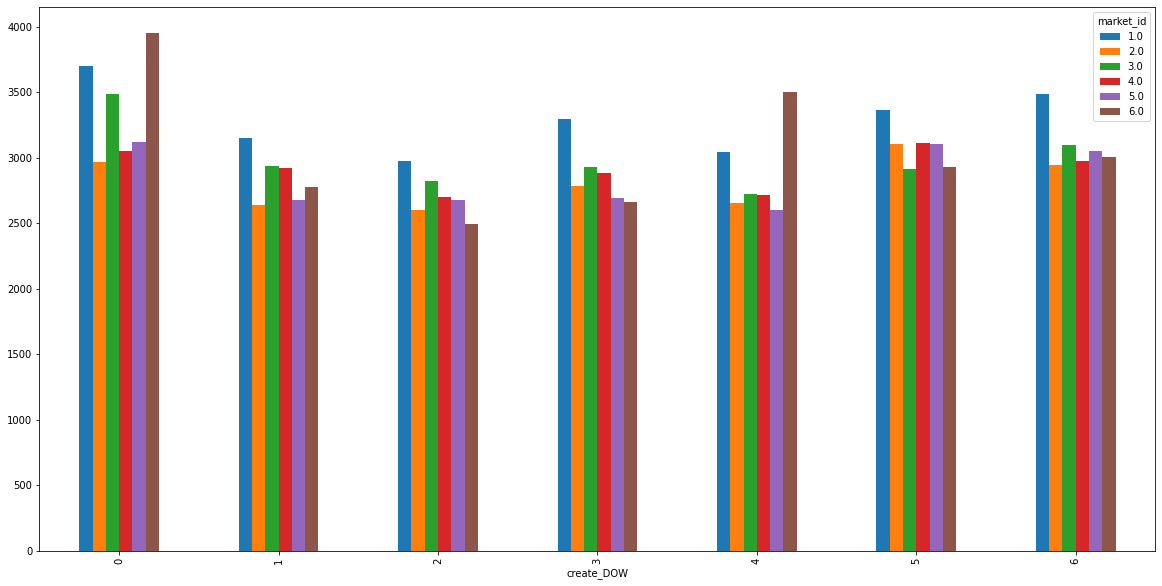

In [247]:
df_train.groupby(['create_DOW','market_id']).mean()['Actual_duration_sec'].unstack('market_id').plot.bar(legend=True,figsize=(20,10))
plt.savefig('create_DOW vs. duration.png')

Monday has the highest average delivery time, the following is Saturday and sunday.
Market number 1 and 6 have the longest delivery time than other markets.



# Machine learning Models:

## Random Forest Regressor

In [200]:
y=df_train['Actual_duration_sec'].astype('int64')
X=df_train[['market_id','store_id','subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders',
         'estimated_store_to_consumer_driving_duration','hour_in','create_DOW','create_m']]

In [201]:

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.33, random_state=42)
rf = RandomForestRegressor(n_estimators = 300,min_samples_split=8)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=8, n_estimators=300)

Text(0.5, 0, 'Relative Importance')

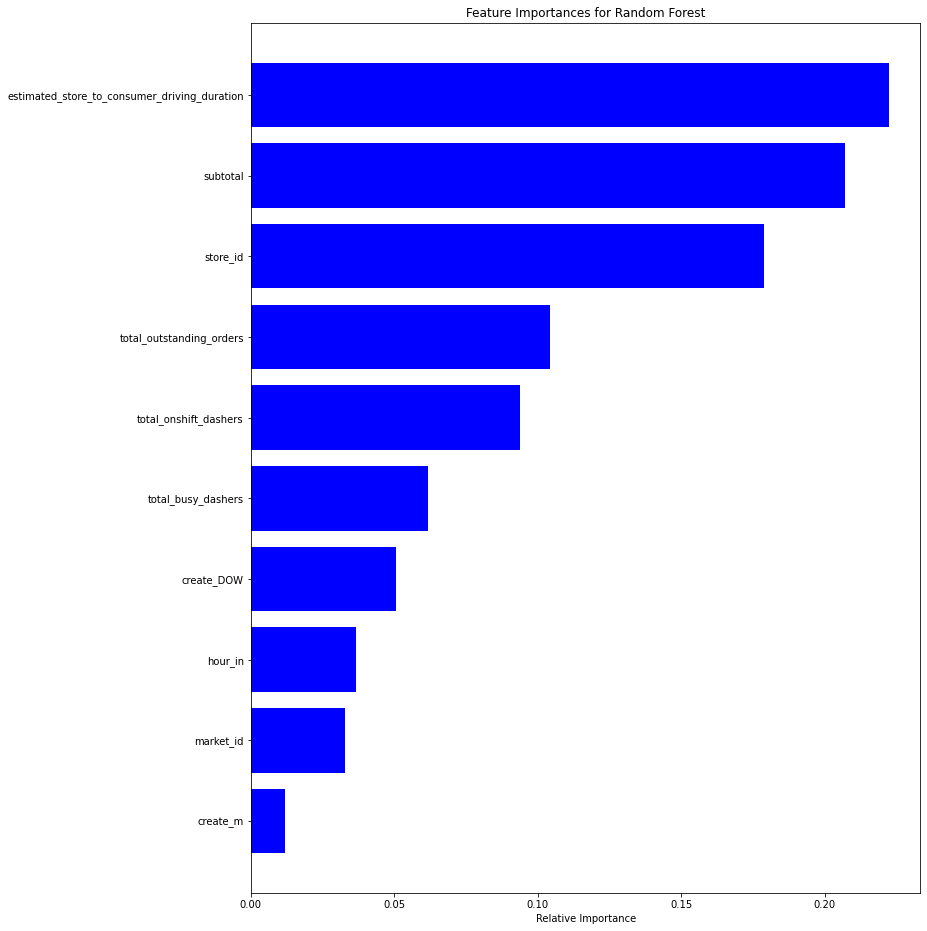

In [202]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,16))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [203]:
prediction=rf.predict(X_test)
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, prediction))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error (MAE): 867.598487007043
Mean Squared Error (MSE): 9129322.95981035
Root Mean Squared Error (RMSE): 3021.4769500709995


# Prediction of Random Forest Regressor model on Test Dataset

In [204]:
df_test=test[['market_id', 'store_id', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration','hour_in','create_DOW', 'create_m']]

In [232]:
test['predicted_delivery_RandomForest']=rf.predict(df_test)


# Linear Regression

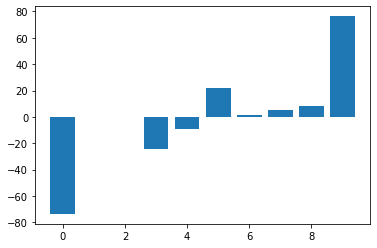

Mean Absolute Error (MAE): 851.9634616787583
Mean Squared Error (MSE): 9103418.907667717
Root Mean Squared Error (RMSE): 3017.1872510117296


In [226]:
import statsmodels as sm
model = LinearRegression().fit(X_train, y_train)    
# get importance
importance = model.coef_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
    
 #with statsmodels
#x_train = sm.add_constant(X_train) # adding a constant
#x_test = sm.add_constant(X_test) # adding a constant
    
#model = sm.OLS(y_train, X_train).fit()
#print(model.summary())
## predict test set  (out-sample)
pred_lin = model.predict(X_test)
## predict train set  (insample)    
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, pred_lin))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, pred_lin))

print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, pred_lin)))

# Prediction of Linear regression model on Test Dataset

In [233]:
df_test=test[['market_id', 'store_id', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers','total_outstanding_orders',
       'estimated_store_to_consumer_driving_duration','hour_in','create_DOW', 'create_m']]
test['predicted_delivery_LinearRegression']=model.predict(df_test)


In [234]:
test.head(10)

,market_id,created_at,store_id,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_id,create_DOW,create_m,hour_in,predicted_delivery_RandomForest,predicted_delivery_LinearRegression
0,3.0,2015-02-25 02:22:30,5477,7500,4.0,4.0,4.0,670.0,194096,2,2,2,3205.771083,3850.017924
1,3.0,2015-02-25 01:14:19,5477,7100,4.0,1.0,1.0,446.0,236895,2,2,1,2959.083204,3448.554609
2,4.0,2015-02-22 02:27:44,5477,4500,9.0,7.0,6.0,504.0,190868,6,2,2,3952.049864,3102.672345
3,3.0,2015-02-25 01:32:39,5477,1700,3.0,3.0,3.0,687.0,183076,2,2,1,3162.239266,3153.560832
4,1.0,2015-02-24 05:20:45,2841,3150,4.0,4.0,4.0,528.0,186200,1,2,5,2829.981853,3280.523141
5,1.0,2015-02-22 01:43:41,2841,6815,5.0,3.0,3.0,837.0,86219,6,2,1,3414.567645,4148.594827
6,1.0,2015-02-23 20:09:23,4139,850,11.0,11.0,16.0,698.0,35439,0,2,20,3503.968725,3317.129739
7,1.0,2015-02-22 05:57:23,5058,1700,11.0,10.0,10.0,502.0,123927,6,2,5,2794.423741,3000.073896
8,1.0,2015-02-25 04:19:59,5058,2179,20.0,24.0,28.0,54.0,107026,2,2,4,2513.358015,2454.415388
9,1.0,2015-02-22 02:24:32,5058,1800,26.0,26.0,20.0,54.0,90341,6,2,2,2896.299270,2093.479349


In [235]:
test.shape

(49913, 14)

In [236]:
test.to_csv('data_to_predict.csv')